# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
import sys
sys.path.append('/Users/christinaland/Downloads/Starter_Code 13/')  # Adjust the path if needed
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | balqash
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | martinsville
Processing Record 4 of Set 1 | maxixe
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | whitehorse
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | marsh harbour
Processing Record 11 of Set 1 | arteche
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | murzuq
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | mariental
Processing Record 17 of Set 1 | hamilton
Processing Record 18 of Set 1 | castillos
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | svobodnyy
Processing Record 22 of Set 1 | iola
Processing 

KeyboardInterrupt: 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          488
Lat           488
Lng           488
Max Temp      488
Humidity      488
Cloudiness    488
Wind Speed    488
Country       488
Date          488
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,balqash,46.8481,74.9950,-13.69,78,88,4.36,KZ,1740701267
1,kodiak,57.7900,-152.4072,2.73,93,100,11.32,US,1740701268
2,martinsville,36.6915,-79.8725,14.90,25,0,3.60,US,1740701204
3,maxixe,-23.8597,35.3472,23.34,86,100,4.97,MZ,1740701270
4,blackmans bay,-43.0167,147.3167,21.07,46,39,2.24,AU,1740701271


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balqash,46.8481,74.9950,-13.69,78,88,4.36,KZ,1740701267
1,kodiak,57.7900,-152.4072,2.73,93,100,11.32,US,1740701268
2,martinsville,36.6915,-79.8725,14.90,25,0,3.60,US,1740701204
3,maxixe,-23.8597,35.3472,23.34,86,100,4.97,MZ,1740701270
4,blackmans bay,-43.0167,147.3167,21.07,46,39,2.24,AU,1740701271


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

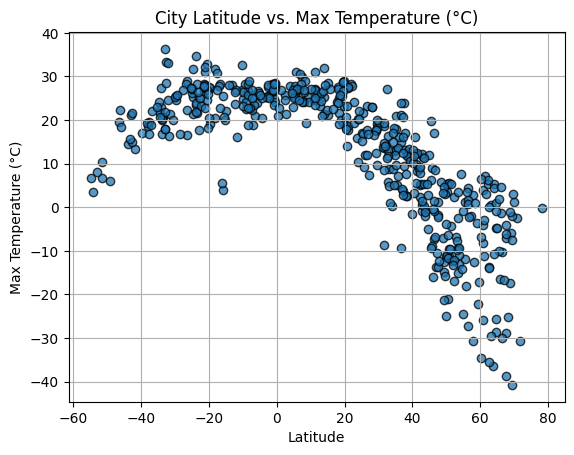

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

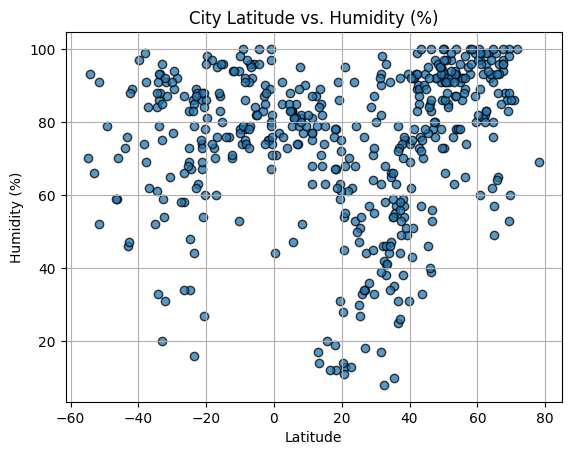

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

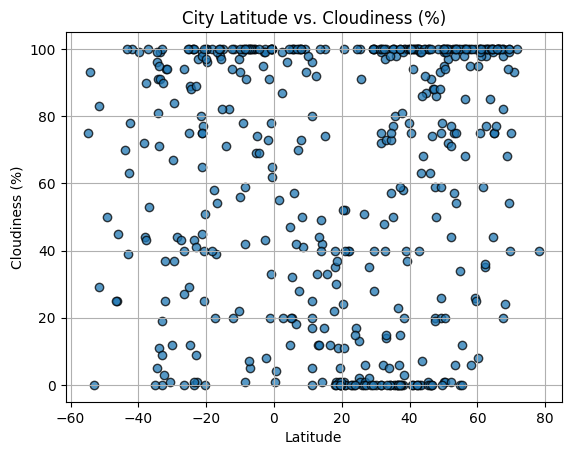

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

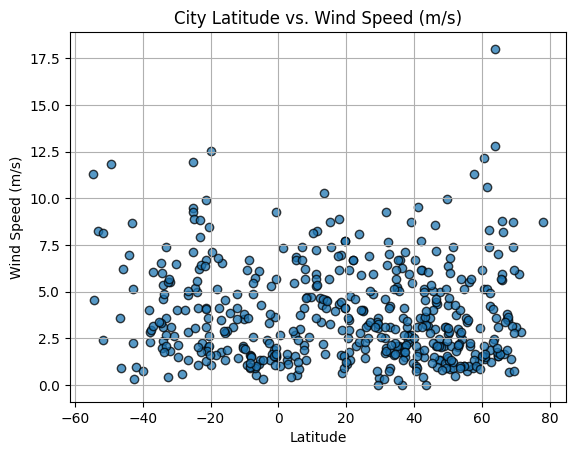

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, title, xlabel, ylabel, filename):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regression_values, "r-")
    plt.annotate(line_eq, (min(x_values), max(y_values)), fontsize=12, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.savefig(filename)
    plt.show()
    print(f"The r^2-value is: {rvalue**2}")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balqash,46.8481,74.9950,-13.69,78,88,4.36,KZ,1740701267
1,kodiak,57.7900,-152.4072,2.73,93,100,11.32,US,1740701268
2,martinsville,36.6915,-79.8725,14.90,25,0,3.60,US,1740701204
5,whitehorse,60.7161,-135.0538,3.90,60,75,5.14,CA,1740701100
6,ribeira grande,38.5167,-28.7000,12.65,75,100,2.68,PT,1740701274


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,maxixe,-23.8597,35.3472,23.34,86,100,4.97,MZ,1740701270
4,blackmans bay,-43.0167,147.3167,21.07,46,39,2.24,AU,1740701271
7,puerto natales,-51.7236,-72.4875,6.66,91,83,2.40,CL,1740701189
8,flying fish cove,-10.4217,105.6791,26.82,94,22,2.06,CX,1740701005
14,waitangi,-43.9535,-176.5597,14.39,73,70,6.96,NZ,1740701282


###  Temperature vs. Latitude Linear Regression Plot

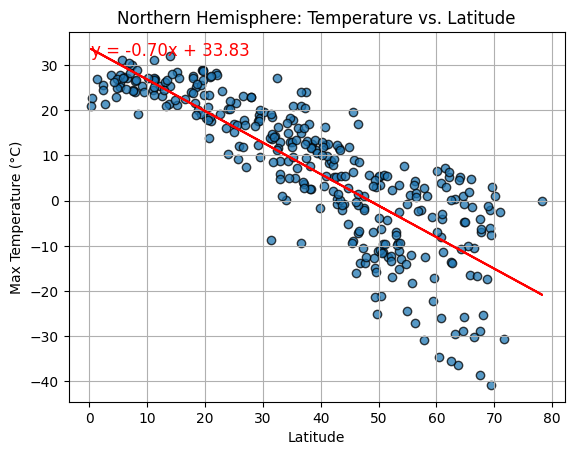

The r^2-value is: 0.6899979429870835


In [16]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                  "Northern Hemisphere: Temperature vs. Latitude",
                  "Latitude", "Max Temperature (°C)", "output_data/Northern_Temp_vs_Lat.png")

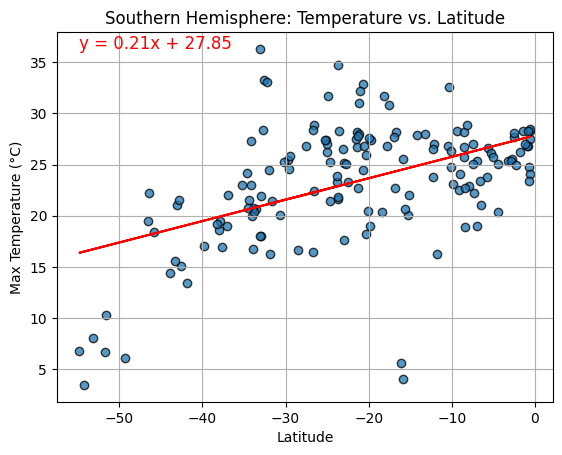

The r^2-value is: 0.2440891831262454


In [17]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                  "Southern Hemisphere: Temperature vs. Latitude",
                  "Latitude", "Max Temperature (°C)", "output_data/Southern_Temp_vs_Lat.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: The R² value was 0.68, indicating a strong correlation between latitude and temperature. The negative slope of the regression line suggests that as latitude increases, temperatures tend to decrease. 
Southern Hemisphere: The R² value was 0.24, indicating a weaker correlation between latitude and temperature. While there is still a trend showing decreasing temperatures with increasing latitude, the lower R² value suggests that other factors

### Humidity vs. Latitude Linear Regression Plot

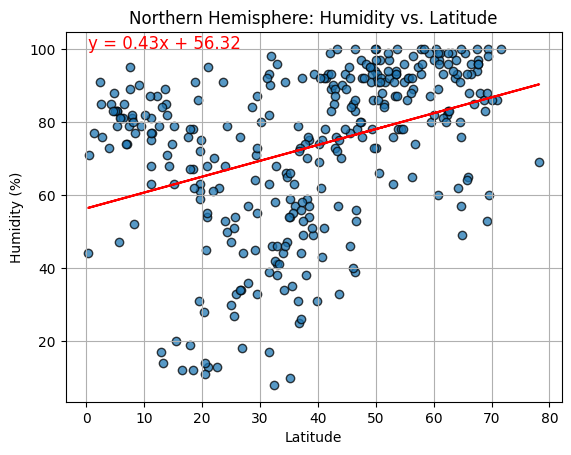

The r^2-value is: 0.13340700300212968


In [18]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                  "Northern Hemisphere: Humidity vs. Latitude",
                  "Latitude", "Humidity (%)", "output_data/Northern_Humidity_vs_Lat.png")


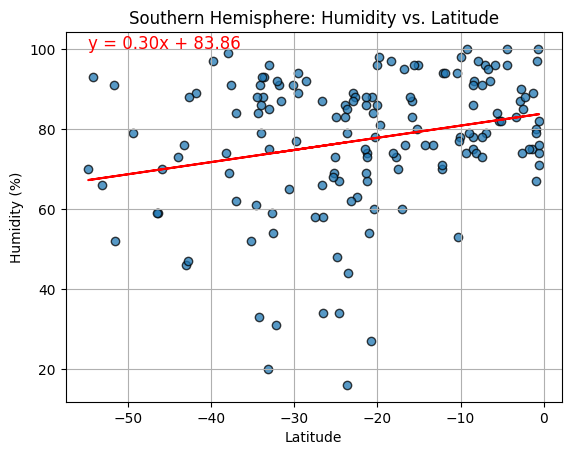

The r^2-value is: 0.06207392245446838


In [19]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                  "Southern Hemisphere: Humidity vs. Latitude",
                  "Latitude", "Humidity (%)", "output_data/Southern_Humidity_vs_Lat.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: 0.133, indicating a weak correlation between latitude and humidity. This suggests that while there may be some relationship between humidity and latitude, it is not strong enough to be a primary factor.Southern Hemisphere: 0.062, which is even lower than the Northern Hemisphere. This further confirms that latitude alone does not strongly determine humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

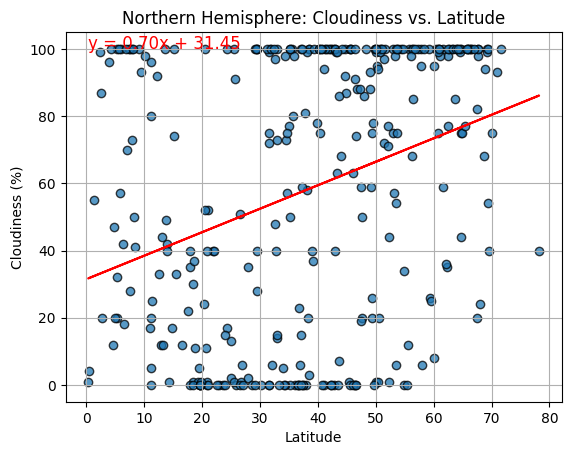

The r^2-value is: 0.10536880745249454


In [20]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                  "Northern Hemisphere: Cloudiness vs. Latitude",
                  "Latitude", "Cloudiness (%)", "output_data/Northern_Cloudiness_vs_Lat.png")


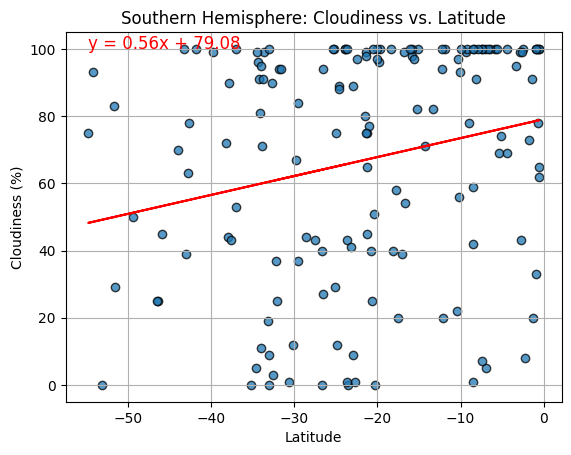

The r^2-value is: 0.0506598215799052


In [21]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                  "Southern Hemisphere: Cloudiness vs. Latitude",
                  "Latitude", "Cloudiness (%)", "output_data/Southern_Cloudiness_vs_Lat.png")

**Discussion about the linear relationship:** 
Northern Hemisphere: 0.10, indicating a very weak correlation between latitude and cloudiness. This suggests that while latitude may have a minor influence, cloud cover is primarily affected by other factors such as local weather patterns, atmospheric pressure systems, and oceanic influences.
Southern Hemisphere: 0.050, which is even lower than the Northern Hemisphere. This further reinforces that latitude is not a strong predictor of cloudiness. The lower correlation in the Southern Hemisphere may be due to a higher proportion of oceanic areas, where cloud cover fluctuates significantly due to marine weather systems.


### Wind Speed vs. Latitude Linear Regression Plot

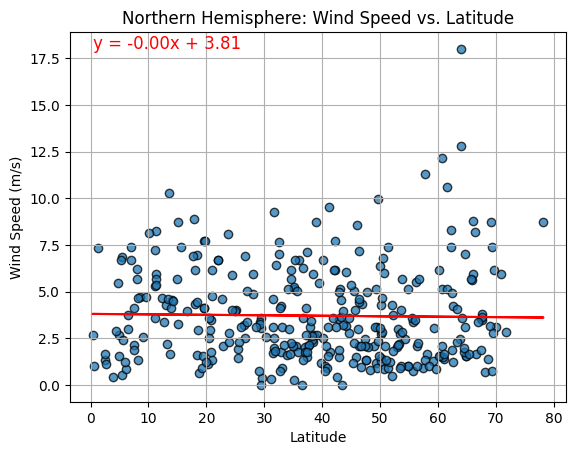

The r^2-value is: 0.00033893506098532915


In [22]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                  "Northern Hemisphere: Wind Speed vs. Latitude",
                  "Latitude", "Wind Speed (m/s)", "output_data/Northern_Wind_vs_Lat.png")


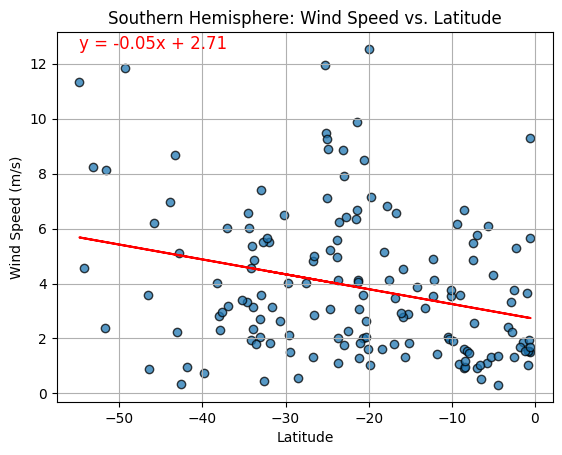

The r^2-value is: 0.07972011223464327


In [23]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                  "Southern Hemisphere: Wind Speed vs. Latitude",
                  "Latitude", "Wind Speed (m/s)", "output_data/Southern_Wind_vs_Lat.png")

**Discussion about the linear relationship:**
Northern Hemisphere: 0.00034, indicating virtually no correlation between latitude and wind speed. This suggests that latitude alone is not a significant predictor of wind speeds in the Northern Hemisphere, and other factors such as local geography, pressure systems, and weather events play a much larger role.
Southern Hemisphere: 0.0797, which is still a very weak correlation but slightly stronger than the Northern Hemisphere. This may be due to the large expanses of open ocean in the Southern Hemisphere, where fewer landmasses allow winds to travel with less obstruction, creating some minor trends.


